In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pprint import pprint
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
class TransferFunction:
    def getTransferFunction():
        raise NotImplementedError
    def getTransferFunctionDerivative():
        raise NotImplementedError

In [4]:
def graphTransferFunction(function):
    x = np.arange(-2.0, 2.0, 0.01)
    plt.figure(figsize=(18,8))
    ax = plt.subplot(121)
    
    ax.set_title(function.__name__)
    plt.plot(x, function.getTransferFunction(x))
    
    ax = plt.subplot(122)
    ax.set_title('Derivative of ' + function.__name__)
    plt.plot(x, function.getTransferFunctionDerivative(x))

In [5]:
class Sigmoid(TransferFunction):
    def getTransferFunction(x):
        return 1/(1+np.exp(-x))
    def getTransferFunctionDerivative(x):
        return x*(1-x)

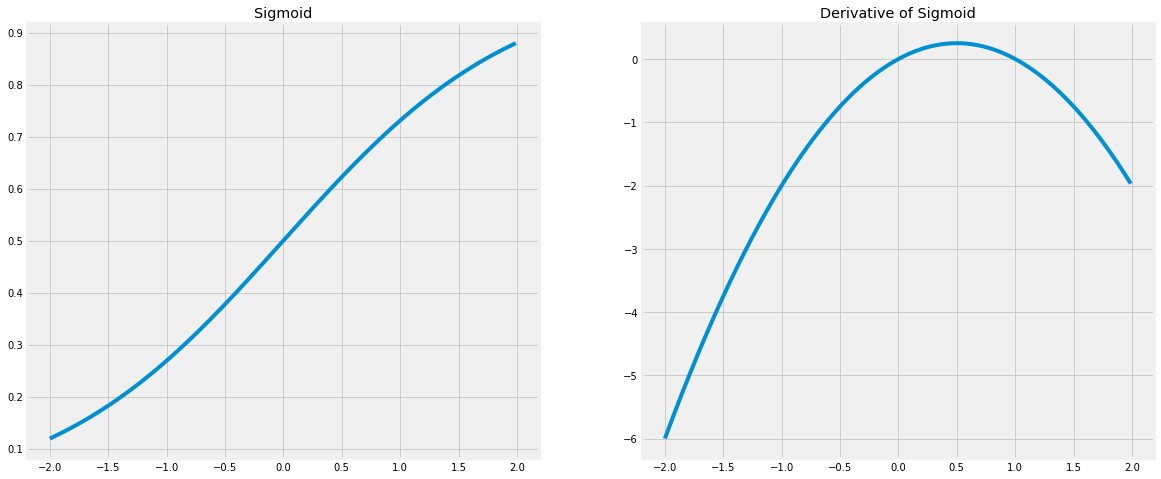

In [7]:
graphTransferFunction(Sigmoid)

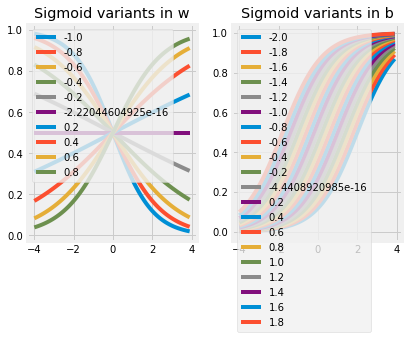

In [11]:
ws = np.arange(-1.0, 1.0, 0.2)
bs = np.arange(-2.0, 2.0, 0.2)
xs = np.arange(-4.0, 4.0, 0.1)
ax = plt.subplot(121)
for i in ws:
    plt.plot(xs, Sigmoid.getTransferFunction(i*xs), label=str(i))
ax.set_title('Sigmoid variants in w')
plt.legend(loc='upper left')

ax = plt.subplot(122)
for i in bs:
    plt.plot(xs, Sigmoid.getTransferFunction(i+xs), label=str(i))
ax.set_title('Sigmoid variants in b')
plt.legend(loc='upper left')

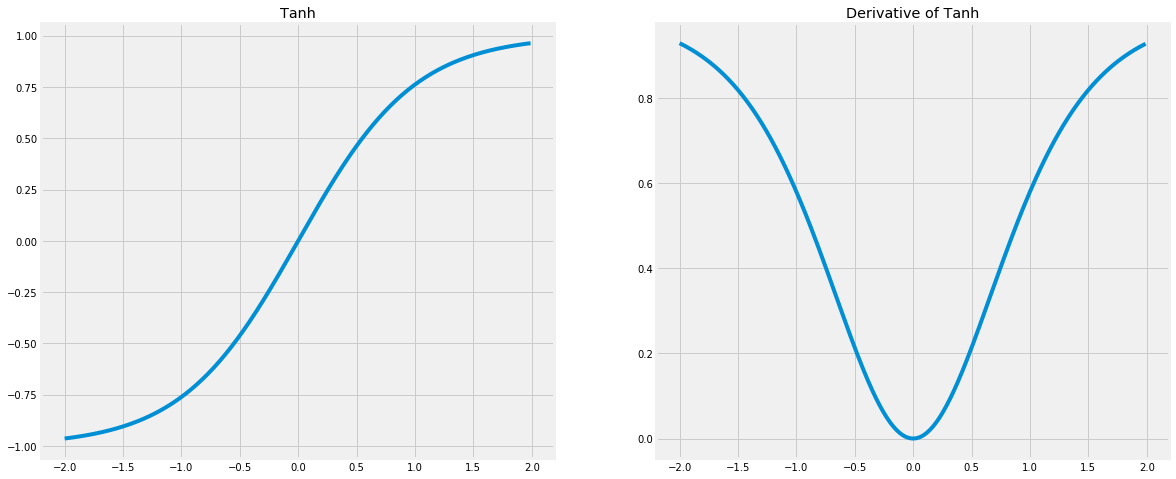

In [12]:
class Tanh(TransferFunction):
    def getTransferFunction(x):
        return np.tanh(x)
    def getTransferFunctionDerivative(x):
        return np.power(np.tanh(x), 2)
graphTransferFunction(Tanh)

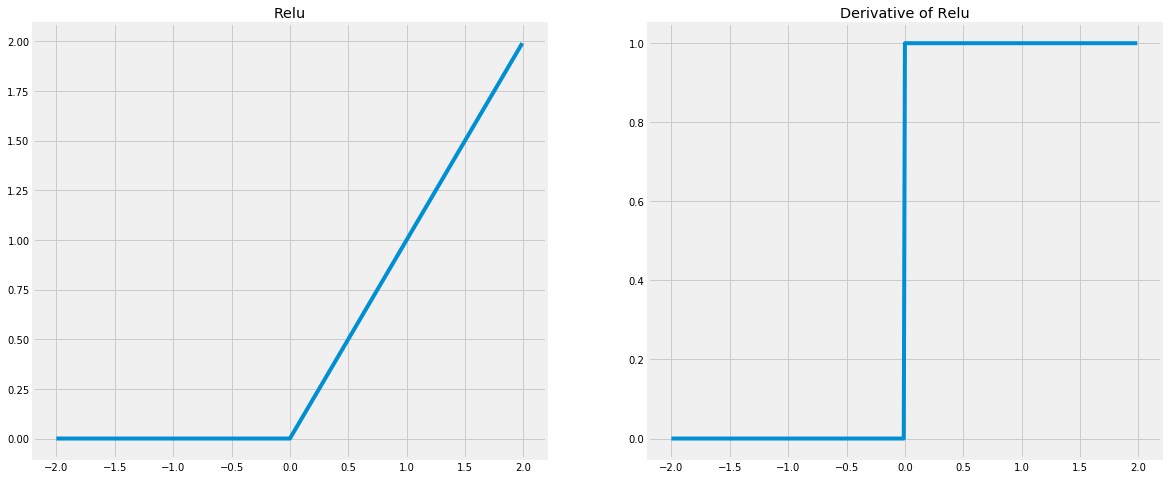

In [13]:
class Relu(TransferFunction):
    def getTransferFunction(x):
        return x*(x>0)
    def getTransferFunctionDerivative(x):
        return 1*(x>0)
graphTransferFunction(Relu)

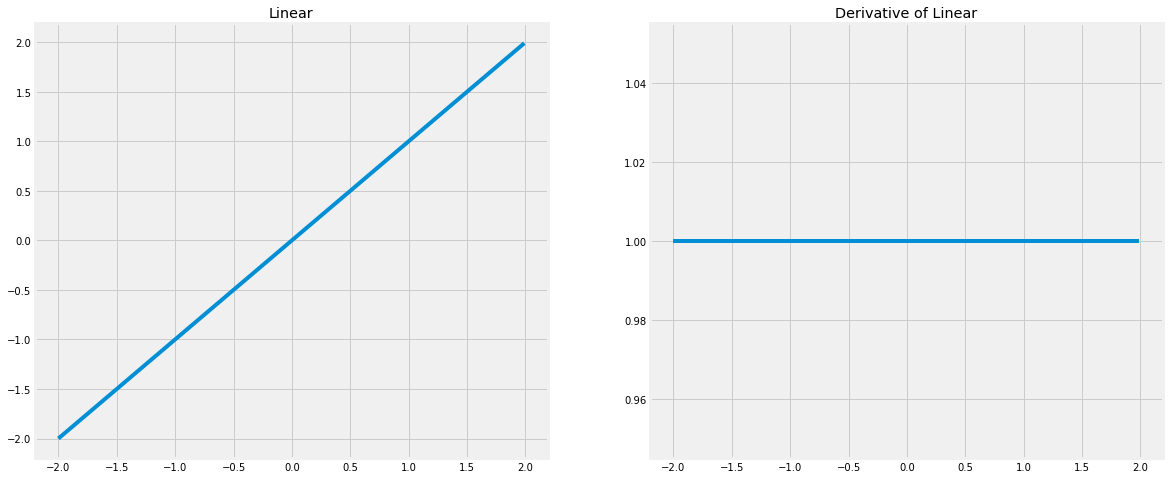

In [14]:
class Linear(TransferFunction):
    def getTransferFunction(x):
        return x
    def getTransferFunctionDerivative(x):
        return np.ones(len(x))
graphTransferFunction(Linear)

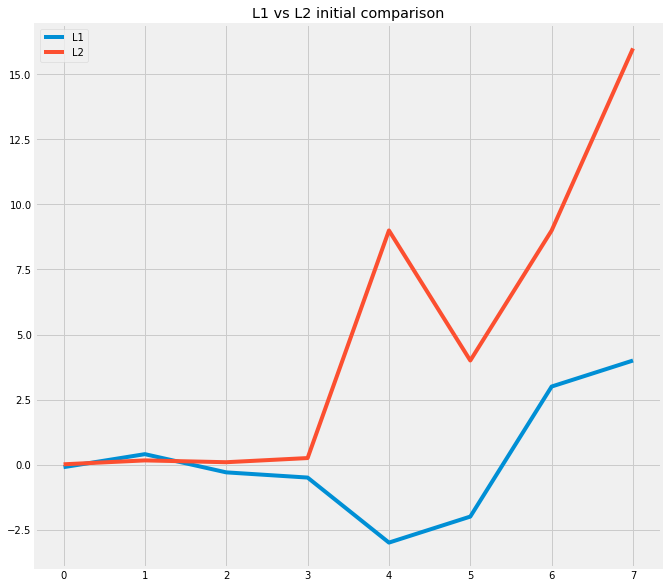

In [15]:
sampley_ = np.array([.1,.2,.3,-.4,-1,-3,6,3])
sampley = np.array([.2,-.2,.6,.10,2,-1,3,-1])
plt.figure(figsize=(10,10))
ax=plt.subplot()
plt.plot(sampley_-sampley, label='L1')
plt.plot(np.power((sampley_-sampley), 2), label="L2")
ax.set_title('L1 vs L2 initial comparison')
plt.legend(loc='best')
plt.show()

In [16]:
class LossFunction:
    def getLoss(y_, y):
        raise NotImplementedError
class L1(LossFunction):
    def getLoss(y_, y):
        return np.sum(y_ - y)
class L2(LossFunction):
    def getLoss(y_, y):
        return np.sum(np.power((y_ - y), 2))

In [17]:
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
y = np.array([
    [0,0,1,1]
]).T

In [18]:
W = 2*np.random.random((3,1)) - 1
print(W)

[[-0.4892187 ]
 [-0.78688282]
 [-0.94865717]]


In [19]:
errorlist = np.empty(3)
weighthistory = np.array(0)
resultshistory = np.array(0)

In [30]:
for iter in range(100):
    l0 = X
    l1 = Sigmoid.getTransferFunction(np.dot(l0, W))
    resultshistory = np.append(resultshistory, l1)
    l1_error = y - l1
    errorlist = np.append(errorlist, l1_error)
    l1_delta = l1_error * Sigmoid.getTransferFunctionDerivative(l1)
    W += np.dot(l0.T, l1_delta)
    weighthistory = np.append(weighthistory, W)

In [31]:
print(l1)

[[ 0.06167215]
 [ 0.04899531]
 [ 0.9604974 ]
 [ 0.95014791]]


[[ 5.91721186]
 [-0.24344906]
 [-2.72425868]]


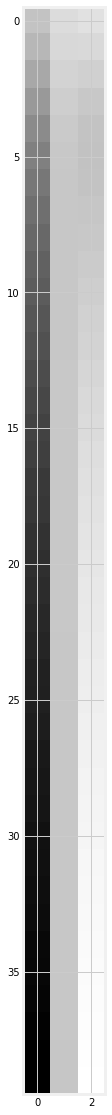

In [32]:
plt.figure(figsize=(20,20))
print(W)
plt.imshow(np.reshape(weighthistory[1:], (-1,3))[:40], cmap=plt.cm.gray_r, interpolation='nearest')

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(np.reshape(resultshistory[1:], (-1,4))[:40], cmap=plt.cm.gray_r, interpolation='nearest')

ValueError: cannot reshape array of size 1203 into shape (4)

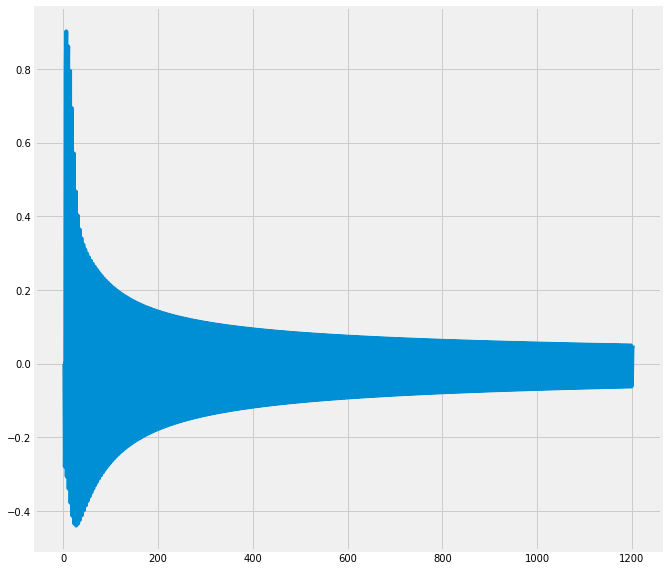

In [34]:
plt.figure(figsize=(10,10))
plt.plot(errorlist)